In [ ]:
# see https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# for more on installing packages for Jupyter Notebook

In [2]:
# pip install ibm-watson - to access Watson Visual Recognition API
import sys
!{sys.executable} -m pip install ibm-watson

In [3]:
# pip install opencv-python -  a package for image processing
!{sys.executable} -m pip install opencv-python

In [4]:
import cv2 #opencv-python
import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

In [7]:
# Downloads an image from a URL, and displays it in the notebook
def plt_image(image_url, size = (10,8)):

    # downloads file as "image.jpg"
    urllib.request.urlretrieve(image_url, "image.jpg") 
    
    image = cv2.imread("image.jpg")
    
    # If image is in color, then correct color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rcParams['figure.figsize'] = size[0], size[1] #set image display size

    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()

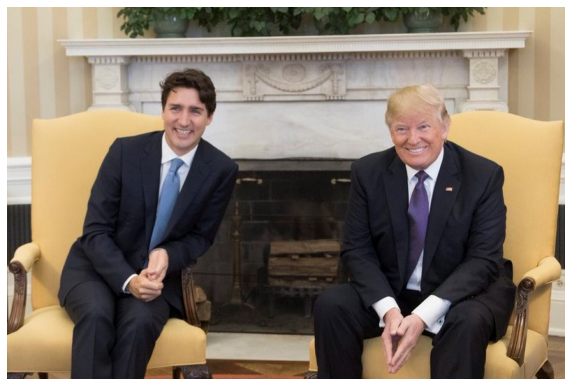

In [6]:
image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'
plt_image(image_url)

In [ ]:
# from IBM cloud, copy your credentials - API key, URL endpoints for IBM Watson Visual Recognition, and paste below

In [9]:
# my_apikey = 'Your_API_Key'
my_apikey = '***' # removing from public file

# url_endpoint = 'copy_from_cloud'
url_endpoint = 'https://api.eu-de.visual-recognition.watson.cloud.ibm.com/instances/66c8c93c-de38-4508-8dc4-25310d43ac99'

In [11]:
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator(my_apikey)

# the API needs a version date
visrec = VisualRecognitionV3('2018-03-19', authenticator = authenticator)

visrec.set_service_url(url_endpoint)

In [12]:
import json

# threshold is set to 0.6, that means only classes that has a confidence score of 0.6 or greater will be shown
classes = visrec.classify(url = image_url, threshold='0.6', classifier_ids = 'default').get_result()

# plt_image(image_url)
print(json.dumps(classes, indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "beige color",
              "score": 0.782
            }
          ]
        }
      ],
      "source_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg",
      "resolved_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


In [13]:
# mapping the result into a dataframe using pandas

In [14]:
from pandas.io.json import json_normalize

def getdf_visrec(url, apikey = my_apikey):
    
    json_result = visrec.classify(url = url, threshold = '0.6', classifier_ids = 'default').get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)
    
    return df

In [15]:
getdf_visrec(image_url)

<ipython-input-14-0a3568255012>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)


,class,score
0,beige color,0.782


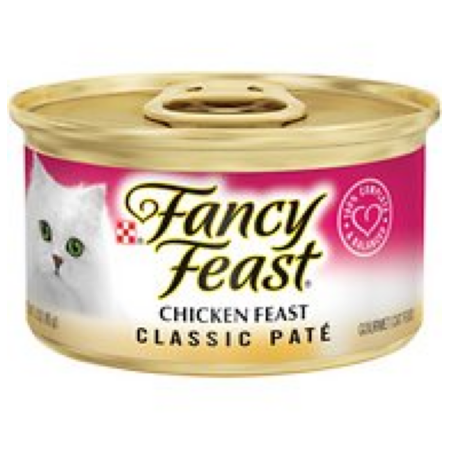

In [20]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/76011_MAIN._AC_SS190_V1446845310_.jpg'
plt_image(url)

In [19]:
getdf_visrec(url)

<ipython-input-14-0a3568255012>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)


,class,score,type_hierarchy
0,food,0.843,NaN
1,toiletry,0.772,NaN
2,cat food,0.710,/food/feed/cat food
3,feed,0.710,NaN
4,pale yellow color,0.697,NaN
5,beige color,0.679,NaN


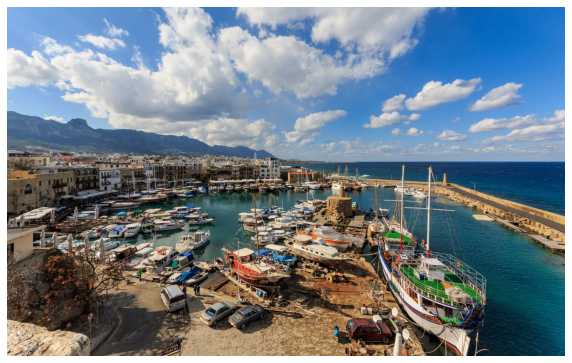

<ipython-input-14-0a3568255012>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)


,class,score,type_hierarchy
0,nature,0.895,NaN
1,sea green color,0.864,NaN
2,blue color,0.858,NaN
3,shore,0.833,NaN
4,natural elevation,0.794,NaN
5,seashore,0.790,/nature/shore/seashore
6,slope,0.782,NaN


In [21]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/2880px-Kyrenia_01-2017_img04_view_from_castle_bastion.jpg'
plt_image(url)
getdf_visrec(url)